In [1]:
import pandas as pd
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

## Importation des données

In [2]:
df2 = pd.read_csv("csv/Questionnaires.csv",sep=";")

In [3]:
df2.head()

,AGE,ID_NUM_TEL,SEXE,NIVEAU_SUPERIEUR_CHOIX,TYPE_TELEPHONE,ABONNEMENT_ILLIMITE,TEMPS_UTILISATION_SMS,ENVOI_SMS_SEMAINE,UTILISATION_T9,DESTINATAIRE_AMIS,DESTINATAIRE_COLLEGUES,DESTINATAIRE_FAMILLE,DESTINATAIRE_COMPAGNON,DUREE_LECTURE
0,16,202,Femme,lycee,classique,non,1 a 3,moins de 5,non,5,3,4,0,"4,19"
1,11,401,Homme,college,autre,oui,moins de 1,20 a 50,non,6,0,1,0,"5,24"
2,15,290,Homme,college,blackberry,non,1 a 3,plus de 100,oui,6,0,6,6,"3,14"
3,12,271,Homme,college,blackberry,oui,1 a 3,plus de 100,non,5,0,2,6,"1,05"
4,14,75,Femme,college,blackberry,oui,plus de 5,plus de 100,non,6,0,2,0,"6,29"


In [4]:
df = pd.read_csv("csv/BDD_sms.csv",sep=";") # on a un pb d'encodage pour certaines lettres --'
df = df[df["SMS_ANON"].notna()]

In [5]:
df.head()

,NUM_SMS,ID_NUM_TEL,SMS_ANON
0,1,477,Hey ca va?\r\nAlors cette rentree?\r\nVa fallo...
1,2,477,Ok super merci! Oui j'y comprends rien du tout...
2,3,477,Coucou !\r\nC'est quand la feria de Nimes?\r\n...
3,4,477,Coucou :)\r\nOui ca c'est bien passe!\r\nAlors...
4,5,477,On peut se rejoindre quelque part? Tu as cours...


## Merge des sms avec les données utilisateurs

In [6]:
df = df.merge(df2, how='left', on='ID_NUM_TEL') # On fusionne les deux dataframes par rapport à leur colonnes ID_NUM_TEL

## Création des corpus SEXE

In [7]:
corpus_sexe = df[["SMS_ANON","SEXE"]] # Selection des bonnes colonnes 
corpus_Femme=corpus_sexe.query("SEXE=='Femme'")
corpus_Homme=corpus_sexe.query("SEXE=='Homme'")


## Création des corpus AGE

In [8]:
from matplotlib import pyplot as plt
age = df["AGE"]
plt.hist(age)
plt.xlabel("Age")
plt.ylabel("Effectif")
plt.show()

<Figure size 640x480 with 1 Axes>

In [9]:
bins= [0,17,19,21,23,25,100] # Interval d'ages 
labels = [1,2,3,4,5,6] # Catégorie 
df["Agegroup"]=pd.cut(df['AGE'], bins=bins, labels=labels, right=False) # On crée une nouvelle colonnes avec les catégories


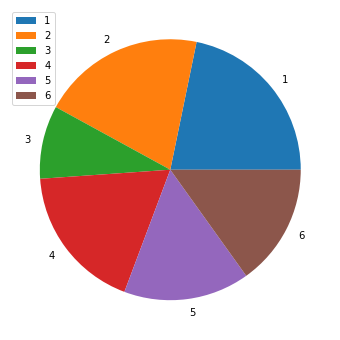

In [10]:
compte = df.groupby(["Agegroup"]).count() 
compte.plot.pie(y='ID_NUM_TEL', figsize=(6, 6)) 
plt.ylabel("")
plt.show()

In [11]:
corpus_age = df[["SMS_ANON","AGE","Agegroup"]] # Selection des bonnes colonnes 
corpus_age1=corpus_age.query('Agegroup==1')
corpus_age2=corpus_age.query('Agegroup==2')
corpus_age3=corpus_age.query('Agegroup==3')
corpus_age4=corpus_age.query('Agegroup==4')
corpus_age5=corpus_age.query('Agegroup==5')

# Comptage des mots

### Listes des stop words en français

In [12]:
stop_words = set(stopwords.words('French')) 

### Création d'un dataframe comptant les mots utilisés dans chaque corpus

In [13]:
vect = CountVectorizer(stop_words=stop_words) 


In [14]:
vect.fit(df["SMS_ANON"]) # Création du bag of word


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words={'ai', 'aie', 'aient', 'aies', 'ait', 'as', 'au',
                            'aura', 'aurai', 'auraient', 'aurais', 'aurait',
                            'auras', 'aurez', 'auriez', 'aurions', 'aurons',
                            'auront', 'aux', 'avaient', 'avais', 'avait',
                            'avec', 'avez', 'aviez', 'avions', 'avons', 'ayant',
                            'ayante', 'ayantes', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

### Tokenization

In [15]:
F_word =  vect.transform(df[df["SEXE"]=='Femme']["SMS_ANON"]) # tokenisation des sms venant des femmes
H_word =  vect.transform(df[df["SEXE"]=='Homme']["SMS_ANON"]) # tokenisation des sms venant des hommes
age1_word =  vect.transform(df[df["Agegroup"]==1]["SMS_ANON"]) # tokenisation des sms venant du groupe d'âge N°1
age2_word =  vect.transform(df[df["Agegroup"]==2]["SMS_ANON"]) # tokenisation des sms venant du groupe d'âge N°2
age3_word =  vect.transform(df[df["Agegroup"]==3]["SMS_ANON"]) # tokenisation des sms venant du groupe d'âge N°3
age4_word =  vect.transform(df[df["Agegroup"]==4]["SMS_ANON"]) # tokenisation des sms venant du groupe d'âge N°4
age5_word =  vect.transform(df[df["Agegroup"]==5]["SMS_ANON"]) # tokenisation des sms venant du groupe d'âge N°5
age6_word =  vect.transform(df[df["Agegroup"]==6]["SMS_ANON"]) # tokenisation des sms venant du groupe d'âge N°6

### Comptage

In [16]:
### Tokenizationnb_F_word = F_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
nb_F_word = F_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
nb_H_word = H_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
nb_age1_word = age1_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
nb_age2_word = age2_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
nb_age3_word = age3_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
nb_age4_word = age4_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
nb_age5_word = age5_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
nb_age6_word = age6_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation


In [17]:
df_F = pd.DataFrame(nb_F_word, columns=vect.get_feature_names()) # création d'un dataframe regroupant le comptage pour FEMME
df_H = pd.DataFrame(nb_H_word, columns=vect.get_feature_names()) # création d'un dataframe regroupant le comptage pour homme
df_age1 = pd.DataFrame(nb_age1_word, columns=vect.get_feature_names()) 
df_age2 = pd.DataFrame(nb_age2_word, columns=vect.get_feature_names()) 
df_age3 = pd.DataFrame(nb_age3_word, columns=vect.get_feature_names()) 
df_age4 = pd.DataFrame(nb_age4_word, columns=vect.get_feature_names()) 
df_age5 = pd.DataFrame(nb_age5_word, columns=vect.get_feature_names()) 
df_age6 = pd.DataFrame(nb_age6_word, columns=vect.get_feature_names()) 

### Création d'un dataFrame pour l'ensemble des sous-corpus

In [18]:
frames = [df_F,df_H,df_age1,df_age2,df_age3,df_age4,df_age5,df_age6]
total_word = pd.concat(frames) # fusion des deux dataframes
total_word = total_word.reset_index(drop=True)
total_word=total_word.T
total_word = total_word.rename(columns={ total_word.columns[0]: "Femme",total_word.columns[1]: "Homme" ,total_word.columns[2]: "Age1"
                                       ,total_word.columns[3]: "Age2",total_word.columns[4]: "Age3"
                                       ,total_word.columns[5]: "Age4",total_word.columns[6]: "Age5"
                                       ,total_word.columns[7]: "Age6"}) # renommage des colonnes

In [19]:
total_word.head(10)

,Femme,Homme,Age1,Age2,Age3,Age4,Age5,Age6
00,7,7,4,0,0,0,1,9
000,11,8,1,4,1,4,5,4
002,1,0,0,0,0,1,0,0
007,0,1,0,0,0,1,0,0
00h,6,0,0,1,0,2,3,0
00h00,2,3,3,0,0,1,0,1
00h15,1,0,0,0,0,0,1,0
00h20,1,0,0,0,1,0,0,0
00h26,1,0,0,0,0,0,0,1
00h30,1,0,0,0,0,0,1,0


In [20]:
total_word.to_csv("comptage_par_corpus.csv",index = True)


### Fréquence des occurences

In [21]:
totaux=total_word.sum(axis=0)


In [22]:
total_word["coeff_fem"] = total_word["Femme"] / totaux['Femme'] * 100
total_word["coeff_hom"] = total_word["Homme"] / totaux['Homme'] * 100
total_word["coeff_age1"] = total_word["Age1"] / totaux['Age1'] * 100
total_word["coeff_age2"] = total_word["Age2"] / totaux['Age2'] * 100
total_word["coeff_age3"] = total_word["Age3"] / totaux['Age3'] * 100
total_word["coeff_age4"] = total_word["Age4"] / totaux['Age4'] * 100
total_word["coeff_age5"] = total_word["Age5"] / totaux['Age5'] * 100
total_word["coeff_age6"] = total_word["Age6"] / totaux['Age6'] * 100


total_word.head()

,Femme,Homme,Age1,Age2,Age3,Age4,Age5,Age6,coeff_fem,coeff_hom,coeff_age1,coeff_age2,coeff_age3,coeff_age4,coeff_age5,coeff_age6
00,7,7,4,0,0,0,1,9,0.001543,0.005325,0.004006,0.00000,0.000000,0.000000,0.000964,0.008701
000,11,8,1,4,1,4,5,4,0.002425,0.006086,0.001002,0.00380,0.001917,0.003316,0.004820,0.003867
002,1,0,0,0,0,1,0,0,0.000220,0.000000,0.000000,0.00000,0.000000,0.000829,0.000000,0.000000
007,0,1,0,0,0,1,0,0,0.000000,0.000761,0.000000,0.00000,0.000000,0.000829,0.000000,0.000000
00h,6,0,0,1,0,2,3,0,0.001323,0.000000,0.000000,0.00095,0.000000,0.001658,0.002892,0.000000


### On peut maintenant afficher les mots les plus utilisés par une pop

In [23]:
total_word.sort_values("coeff_fem",ascending = False).head(10)

,Femme,Homme,Age1,Age2,Age3,Age4,Age5,Age6,coeff_fem,coeff_hom,coeff_age1,coeff_age2,coeff_age3,coeff_age4,coeff_age5,coeff_age6
ça,6454,1171,1425,1292,347,2821,1043,697,1.422667,0.890779,1.427198,1.227239,0.665159,2.338420,1.005369,0.673808
oui,4909,1001,930,1149,541,977,1435,878,1.082100,0.761460,0.931434,1.091406,1.037034,0.809868,1.383226,0.848785
si,4894,1426,1024,1183,614,1310,1135,1054,1.078793,1.084757,1.025579,1.123702,1.176967,1.085902,1.094050,1.018928
va,4818,1321,898,1119,619,1298,1134,1071,1.062041,1.004884,0.899385,1.062910,1.186551,1.075955,1.093086,1.035363
bien,4421,1284,757,1100,534,1125,1072,1117,0.974529,0.976738,0.758168,1.044863,1.023616,0.932550,1.033323,1.079832
ca,4378,899,514,1574,755,665,1044,725,0.965051,0.683869,0.514793,1.495103,1.447247,0.551240,1.006333,0.700876
fait,4246,873,936,1111,453,1130,766,723,0.935954,0.664090,0.937444,1.055311,0.868348,0.936694,0.738363,0.698942
lol,4179,971,174,1372,326,1284,1136,858,0.921185,0.738639,0.174268,1.303229,0.624904,1.064350,1.095014,0.829450
non,3723,900,727,796,402,1211,948,539,0.820668,0.684629,0.728121,0.756101,0.770587,1.003838,0.913797,0.521065
plus,3566,981,798,933,440,1038,651,687,0.786060,0.746246,0.799231,0.886233,0.843429,0.860433,0.627512,0.664140


In [24]:
total_word.sort_values("coeff_hom",ascending = False).head(10)

,Femme,Homme,Age1,Age2,Age3,Age4,Age5,Age6,coeff_fem,coeff_hom,coeff_age1,coeff_age2,coeff_age3,coeff_age4,coeff_age5,coeff_age6
si,4894,1426,1024,1183,614,1310,1135,1054,1.078793,1.084757,1.025579,1.123702,1.176967,1.085902,1.094050,1.018928
va,4818,1321,898,1119,619,1298,1134,1071,1.062041,1.004884,0.899385,1.062910,1.186551,1.075955,1.093086,1.035363
bien,4421,1284,757,1100,534,1125,1072,1117,0.974529,0.976738,0.758168,1.044863,1.023616,0.932550,1.033323,1.079832
ça,6454,1171,1425,1292,347,2821,1043,697,1.422667,0.890779,1.427198,1.227239,0.665159,2.338420,1.005369,0.673808
oui,4909,1001,930,1149,541,977,1435,878,1.082100,0.761460,0.931434,1.091406,1.037034,0.809868,1.383226,0.848785
plus,3566,981,798,933,440,1038,651,687,0.786060,0.746246,0.799231,0.886233,0.843429,0.860433,0.627512,0.664140
bon,3350,980,611,745,368,935,889,782,0.738447,0.745485,0.611942,0.707657,0.705413,0.775052,0.856925,0.755979
lol,4179,971,174,1372,326,1284,1136,858,0.921185,0.738639,0.174268,1.303229,0.624904,1.064350,1.095014,0.829450
tout,2947,934,713,732,446,895,536,559,0.649613,0.710493,0.714100,0.695309,0.854930,0.741895,0.516661,0.540399
non,3723,900,727,796,402,1211,948,539,0.820668,0.684629,0.728121,0.756101,0.770587,1.003838,0.913797,0.521065


### Traitement du sms d'entrée

In [25]:
sms=["slt sa va? marre detre confiné jvais courir a+"]

In [26]:
sms_word =  vect.transform(sms) # tokenisation du nouvel sms
nb_sms_word = sms_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
df_sms = pd.DataFrame(nb_sms_word, columns=vect.get_feature_names()) 
df_sms=df_sms.T
df_sms = df_sms.rename(columns={ df_sms.columns[0]: "New"}) 
tot=df_sms.sum(axis=0)
df_sms["coeff_new"] = df_sms["New"] / tot['New'] * 100
df_sms.sort_values("coeff_new",ascending = False).head(10)

,New,coeff_new
marre,1,16.666667
slt,1,16.666667
courir,1,16.666667
detre,1,16.666667
jvais,1,16.666667
va,1,16.666667
passerelles,0,0.000000
passport,0,0.000000
passions,0,0.000000
passionée,0,0.000000


In [37]:
final=total_word.iloc[:,8:]
final['new_sms']=df_sms["coeff_new"]
#final['index'] = final.index
final.head()


,coeff_fem,coeff_hom,coeff_age1,coeff_age2,coeff_age3,coeff_age4,coeff_age5,coeff_age6,new_sms
00,0.001543,0.005325,0.004006,0.00000,0.000000,0.000000,0.000964,0.008701,0.0
000,0.002425,0.006086,0.001002,0.00380,0.001917,0.003316,0.004820,0.003867,0.0
002,0.000220,0.000000,0.000000,0.00000,0.000000,0.000829,0.000000,0.000000,0.0
007,0.000000,0.000761,0.000000,0.00000,0.000000,0.000829,0.000000,0.000000,0.0
00h,0.001323,0.000000,0.000000,0.00095,0.000000,0.001658,0.002892,0.000000,0.0


In [41]:
final['diff_F']=final['new_sms']-final['coeff_fem']
final['diff_H']=final['new_sms']-final['coeff_hom']
final['diff_age1']=final['new_sms']-final['coeff_age1']
final['diff_age2']=final['new_sms']-final['coeff_age2']
final['diff_age3']=final['new_sms']-final['coeff_age3']
final['diff_age4']=final['new_sms']-final['coeff_age4']
final['diff_age5']=final['new_sms']-final['coeff_age5']
final['diff_age6']=final['new_sms']-final['coeff_age6']
final=final.iloc[:,9:]
final.head()

,new_sms,diff_H,diff_F,diff_age1,diff_age2,diff_age3,diff_age4,diff_age5,diff_age6
00,0.0,-0.005325,-0.001543,-0.004006,0.00000,0.000000,0.000000,-0.000964,-0.008701
000,0.0,-0.006086,-0.002425,-0.001002,-0.00380,-0.001917,-0.003316,-0.004820,-0.003867
002,0.0,0.000000,-0.000220,0.000000,0.00000,0.000000,-0.000829,0.000000,0.000000
007,0.0,-0.000761,0.000000,0.000000,0.00000,0.000000,-0.000829,0.000000,0.000000
00h,0.0,0.000000,-0.001323,0.000000,-0.00095,0.000000,-0.001658,-0.002892,0.000000


In [42]:
comp=final.sum(axis=0)
comp

new_sms      1.000000e+02
diff_H      -5.868025e-13
diff_F       2.612411e-12
diff_age1    1.398664e-14
diff_age2    1.051308e-12
diff_age3   -8.875283e-13
diff_age4    2.544407e-12
diff_age5   -1.685838e-12
diff_age6    1.578125e-12
dtype: float64